# Cleaning and Analyzing Employee Exit Surveys

## Introduction
In this project, I take on the role of a data analyst. I work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

## Goals
My goals are to clean and analyze the data to answer the following questions to stakeholders:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Data
Below is a preview of a couple columns I'll work with from the dete_survey.csv:

* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns I'll work with from the tafe_survey.csv:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

I'll start by reading the datasets into pandas and exploring them

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print("DETE Information")
dete_survey.info()
dete_survey.tail()

DETE Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Phys

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977,1999,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980,1980,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009,2009,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001,2009,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,Not Stated,Not Stated,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print("TAFE Information")
tafe_survey.info()
tafe_survey.head()

TAFE Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                           

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Some observations based on the outputs above:

* Both datasets have different shapes
    * DETE has 56 columns and 821 rows
    * TAFE has 72 columns and 702 rows
* This will need to be resolved prior to combining any results
* There are several missing/NaN entries in both datasets, some missing values are not represented as NaN
* Both datsets record answers in different ways and formats, there are some duplicate columns but with different names
* There are several entries that indicate dissatisfaction as a reason for resigning

To address the issue of missing values not being labeled as `NaN`, I'll reread the .csv files into pandas. I'll read `Not Stated` in as `NaN`. Also, I'll drop the unnecessary columns from both data frames.

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Data Cleaning
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns I'd like to use for our final analysis:

| dete_survey | tafe_survey | Definition |
|-------------|-------------|------------|
|ID           |Record ID    |An ID used to identify the participant of the survey|
|Separation Type|Reason for ceasing employment|The reason the participant's employment ended|
|Cease Date| CESSATION YEAR| The year or month the participant's employment ended|
|Age| CurrentAge. Current Age| The age of the participant|



Because I eventually want to combine them, I'll have to standardize the column names. I'll do this for the `dete_survey_updated` data frame by removing whitespace from the column names, and replacing spaces and backslashes with with underscores.

In [4]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.replace(" ","").str.replace("/", "_").str.lower()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


For the `tafe_survey_updated` data frame, I'll pass in a dictionary to rename some of the column names. The others will be handled later.

In [5]:
new_names = {'Record ID': 'id',
             'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separationtype',
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=new_names)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Since I'm only interested in employees that resigned due to dissatisfaction I'll look in the `separationtype` column for entries that contain `Resignation`. However, the `dete_survey_updated` dataframe contains multiple separation types with the string 'Resignation':

* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

So I'll have to account for each of these variations so I don't unintentionally drop data.

In [6]:
dete_survey_updated['separationtype'].value_counts()
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [7]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In the two cells above, I used `.value_counts()` to review the unique values in the `separationtype` columns of both data frames. Then I assigned the corresponding resignation types to their own variable using the `.copy()` method. I used this method to avoid a 'SettingWithCopy' warning.

## Checking the Data for Errors
Before I start cleaning and manipulating the rest of the data, I'll verify that the data doesn't contain any major inconsistencies. I'll focus on verifying the years in `cease_date` and `dete_start_date` make sense. The `cease_date` should be after the `dete_start_date`. Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [8]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

It looks like there are different formats in this column that prevent me from getting a clear picture of the data. Since I'm only interested in the year, I'll extract the year and make sure I convert it to a float.

In [9]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [10]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Interestingly, there is a wide range of start dates from 1963 to 2013, but most resignations occured in 2012/2013.

In [11]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

The `tafe_resignations` data frame is in the correct format so I don't need to manipulate it. There doesn't seem to be any major issues with the years. 

In order to answer the question: 
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

I'll need to calculate how long employees spent in their workplace. The `tafe_resignations` data frame already has this information in the `institute_service` column. I'll need to create a similar column in `dete_resignations` so I'll be able to combine the two data frames.

## Calculating Length of Employment
I will create an `institute_service` column in `dete_resignations` and will subtract the `dete_start_date` from the `cease_date`.

In [12]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


## Identifying Dissatisfied Employees
Now, I'll identify any employees who resigned because they were dissatisfied.

Below are the columns I'll use to categorize employees as "dissatisfied" from each dataframe. 

* tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction

* dafe_survey_updated:
    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

If the employee indicated any of the factors above caused them to resign, I'll mark them as dissatisfied in a new column.

First, I'll examine the `tafe_resignation` data set.

In [13]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [14]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Here, I create a function that will update the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values. Then, I will use the `any()` methods to create a dissatisfied column in both data frames.

In [15]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()


tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [16]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining Data Sets
Now the data ready to be combined. My end goal is to aggregate the data according to the `institute_service` column. First, I'll add an `institute` column to each data frame with the name of the organization that gave the surveys. This will allow me to easily distinguish between the two. Then I will combine the data frames using the `pd.concat()` method.

In [17]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True, axis=0)

Now that the data frames are combined into a single data frame, there are still some columns that I need to drop. I'll drop any columns that have less than 500 non null values.

In [18]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [19]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

## Categorizing the Service Column
The `institute_service` column has values in a few different formats:

In [20]:
combined_updated['institute_service'].value_counts(dropna=False).head(10)

NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
3.0                 20
Name: institute_service, dtype: int64

To analyze the data, I'll convert the numbers into categories. My analysis will be based on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective. We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

I'll use string methods to extract the years of service and change the string to a float.

In [21]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Now that I have all the years as floats, I'll create a function that maps each value to one of the career stages.

In [22]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Initial Analysis
Since the `dissatisfied` column consists of Boolean values, which the `pivot_table()` method treats as integers,  I can aggregate the `dissatisfied` column and calculate the number of people or the percentage of dissatisfied within each group.

In [23]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

From looking at the column, I have 8 missing values that need to be dealt with. I'll replace the missing values with the value the occurs most frequently in the column, which is False.

In [24]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

Now I'll calculate the percentage of employees who resigned due to dissatisfaction in each category, and plot the results on a bar chart.

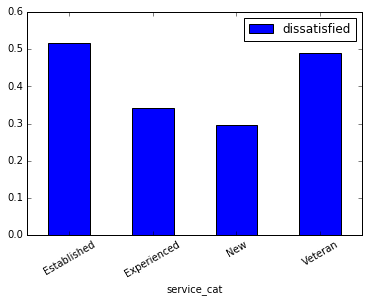

In [55]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
dis_pct.plot(kind='bar', rot=30)

From the initial analysis results, I can state that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service.

## Cleaning the Age Column
To answer one of the original questions:
Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
I'll have to clean the `age` column in the data frame.
However, I also want to see how much data is still missing. Using the `isnull().sum()` I can see that 55 entries have age missing along with 59 missing gender entries and 88 missing institute service.

In [26]:
combined_updated.isnull().sum()

age                     55
cease_date              16
dissatisfied             0
employment_status       54
gender                  59
id                       0
institute                0
institute_service       88
position                53
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

Before cleaning, I'd also like to know how the age column is structured.

In [27]:
combined_updated['age'].value_counts(dropna=False, ascending=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The data is organized by age being in the form of an age range. This is helpful because I can categorize the age column similar to the `institute_service` column. However, there are some repeat age ranges as separate categories due to the absence of a hyphen. Also, there is a '56 or older' and a '56-60' range that will need to be dealt with. I also see that the missing data category is the second largest. I'll take a closer look at these columns.

In [28]:
age_missing = combined_updated[combined_updated['age'].isnull()]
print(age_missing)

     age  cease_date  dissatisfied    employment_status  gender            id  \
68   NaN      2012.0         False  Permanent Part-time  Female  2.150000e+02   
93   NaN      2012.0         False  Permanent Full-time  Female  2.860000e+02   
141  NaN      2012.0         False                  NaN     NaN  4.060000e+02   
301  NaN      2013.0         False  Permanent Part-time     NaN  8.040000e+02   
310  NaN      2013.0         False                  NaN     NaN  8.230000e+02   
311  NaN      2010.0         False                  NaN     NaN  6.341399e+17   
322  NaN      2010.0         False                  NaN     NaN  6.341770e+17   
324  NaN      2010.0         False                  NaN     NaN  6.341779e+17   
325  NaN      2010.0         False                  NaN     NaN  6.341820e+17   
326  NaN      2010.0          True                  NaN     NaN  6.341821e+17   
327  NaN      2010.0         False                  NaN     NaN  6.341831e+17   
331  NaN      2010.0        

For rows with missing age data, it looks like most were not dissatisfied with the job, but most importantly, these rows are also missing several other pieces of data such as gender and employment status that would be unwise to impute. In this case, I'm going to drop these rows because they don't aid in the analysis I am trying to perform. Also, these rows only make up 8% of the overall data set.

In [29]:
combined_updated.dropna(subset=['age'], inplace=True)

Now I need to clean up the age categories. I'll format the strings to replace characters.

In [30]:
combined_updated['age'] = combined_updated['age'].str.replace("  ", " ").str.replace(" or older", "+").str.replace(" ","-")

In [31]:
combined_updated['age'].unique()

array(['36-40', '41-45', '31-35', '46-50', '61+', '56-60', '51-55',
       '21-25', '26-30', '20-or-younger', '56+'], dtype=object)

Age ranges are broken down into 5 year intervals, as a result there are 11 categories. There is also three similar categories: 56-60, 56+, and 61+. Below I can see that these categories are relatively small compared to others, so I'll combine them.

In [32]:
combined_updated['age'].value_counts(dropna=False, ascending=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56+              29
56-60            26
61+              23
20-or-younger    10
Name: age, dtype: int64

In [52]:
combined_updated['age'].replace({'56-60':'56+', '61+':'56+','20-or-younger':'20 and below'}, inplace=True)

Now that the Age column has been cleaned, I can see whether younger employees are more dissatisfied than older employees. I'll calculate the percent of dissatisfied employees within each age category and plot it as a bar chart.

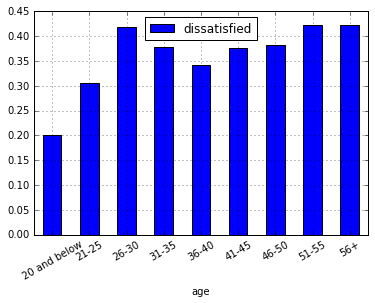

In [53]:
age_dis_pct = combined_updated.pivot_table(index='age', values='dissatisfied')

age_dis_pct.plot(kind='bar', rot=30, grid=True)

From the plot above, I made the following observations:

* Employees in their late 20s are just as dissatisfied as employees 51 and older. 
* About 42% of employees in these age ranges cited dissatisfaction as the reason for resigning.
* However, age ranges between these two reported sligtly lower rates of resigning due to dissatisfaction.
* Only 20-30 % of employees aged 20-25 resigned due to dissatisfaction.

Before I move on, I want to check to see if the `service_cat` column changed at all since dropping missing age columns.

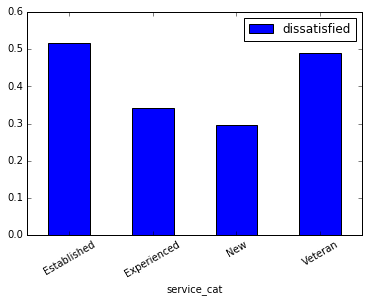

In [56]:
#replotting the service category data
dis_pct.plot(kind='bar', rot=30)

The proportions are about the same as they were before dropping the missing age data. About half of established and Veteran employees reported dissatisfaction as the reason for resigning.

In [57]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation,7.0,Established
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation,18.0,Veteran
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation,3.0,Experienced
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation,15.0,Veteran
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation,3.0,Experienced
